# INTRODUCTION

## Company Overview
Bazaar is on a mission to transform the way businesses operated in Pakistan. With their innovative commerce and financial services platform, they aim to empower millions of businesses across the country.

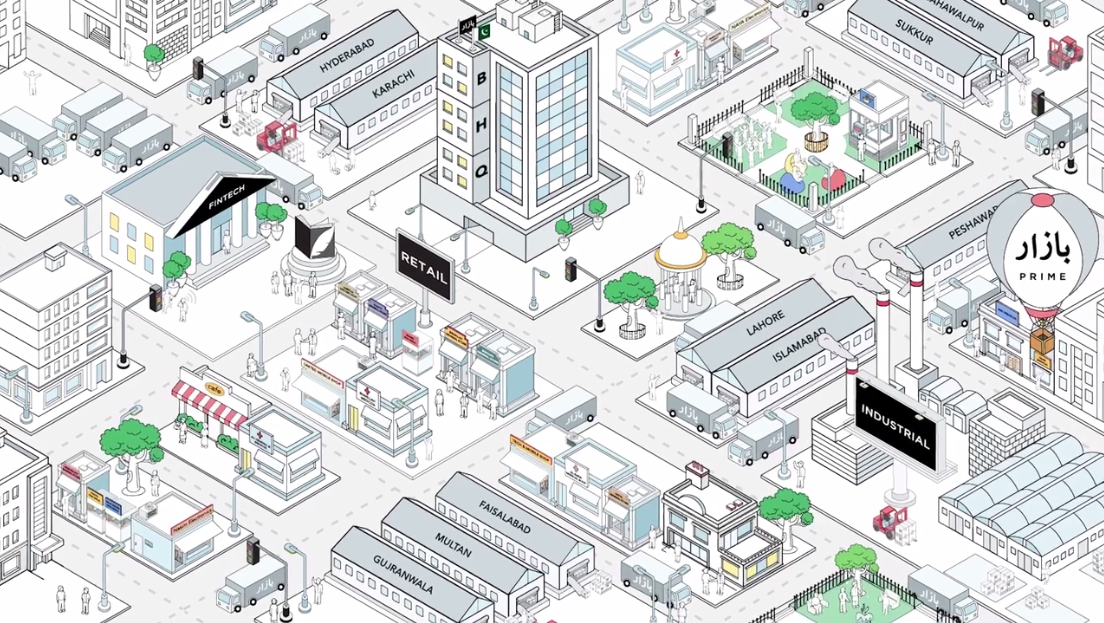

## Case Study Brief
We have been entrusted with delving into the world of Bazaar's customer experience. The head of the customer experience wants to understand the reasons behind product returns, as returns can often indicate customer dissatisfaction or operational inefficiencies. With a dataset full of valuable information about deliveries, we will explore and uncover hidden insights. We are supposed to seek answers to the questions that haunt the minds of the stakeholders at Bazaar:

- What happened?
- Why does it matter? And most importantly,
- What should we do next?

## Objectives

Our mission is not just to uncover what happened, but to understand why it matters. We will dig deep, exploring the factors that contribute to returns and customer dissatisfaction. Was it a result of out-of-stock items? Were there issues with delivery or product quality? By unraveling the causes behind returns, we can help Bazaar make informed decisions and take proactive measures to enhance their customers journey.

Let's explore the data to uncover valuable insights that will shape Bazaar and benefit its customers in Pakistan's business landscape.

# DATA PREPROCESSING

## Load the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgn

In [3]:
dataset = pd.read_csv("Analytics Case Study Dataset - Bazaar Launchpad 2023.csv")
dataset.head()

,dispatch_date,order_date,city,town,uc,delivery_warehouse,delivered_by,store_id,shaheen_id,tour_number,...,item_discount,net_gmv,gross_nmv,adjustment_amount,ordered_quantity,delivered_quantity,returned_quantity,out_of_stock_quantity,adjustment_reason,simplified_return_reason
0,8/1/2022,7/30/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,10,2860,0,0,2,0,2,0,NaN,Customer Issue
1,8/1/2022,7/31/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,1764,1764,0,3,3,0,0,NaN,NaN
2,8/1/2022,7/31/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,1368,1368,0,3,3,0,0,NaN,NaN
3,8/1/2022,7/30/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,0,2352,0,0,4,0,4,0,NaN,Customer Issue
4,8/1/2022,7/29/2022,Peshawar,Mardan,MDN-04 (Sabzi Mandi),ISB1,BAZAAR_RIDER,7M1NQJBMHLBgojlLWOQ7ia,L25UDNtYbloECsTcdGdvD,11-22-212-0063,...,3,1136,1160,0,8,8,0,0,NaN,NaN


The dataset provided for our analysis contains information about deliveries from a few days in the cities of **Peshawar and Gujranwala**. The dataset consists of **19,739 entries**, each representing a unique delivery transaction. It comprises multiple columns that capture various aspects of the delivery process, customer orders, and product details.

The dataset includes the following columns:

**dispatch_date:** _The date on which the order was dispatched_

**order_date:** _The date on which the order was placed._

**city:** _The city where the store is located in._

**town:** _The town where the store is located in._

**uc:** _The union council the store is located in._

**delivery_warehouse:** _The warehouse serving the delivery operation._

**delivered_by:** _The group of persons responsible for delivery._

**store_id:** _The store/customer_id._

**shaheen_id:** _The id of the delivery rider._

**tour_number:** _The vehicle number, used for internal tracking._

**delivery_type:** _The type of delivery._

**order_number:** _The order number._

**order_channel:** _The source channel the order came from._

**item_id:** _The unique id for the item._

**item_name:** _The name of the item._

**weight:** _The weight of the item._

**amount_per_unit:** _The amount charged per unit of the item._

**gross_gmv:** _The Gross Merchandise Value (GMV) of the order._

**item_discount:** _The discount applied to the item._

**net_gmv:** _The net GMV after deducting the discount._

**gross_nmv:** _The gross Net Merchandise Value (NMV) of the order._

**adjustment_amount:** _Any adjustment amount applied to the order._

**ordered_quantity:** _The quantity of items ordered._

**delivered_quantity:** _The quantity of items delivered._

**returned_quantity:** _The quantity of items returned._

**out_of_stock_quantity:** _The quantity of items that were out of stock._

**adjustment_reason:** _The reason for any adjustments made to the order (limited data available)._

**simplified_return_reason:** _A simplified reason for the item return (limited data available)._

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19739 entries, 0 to 19738
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dispatch_date             19739 non-null  object 
 1   order_date                19739 non-null  object 
 2   city                      19739 non-null  object 
 3   town                      19739 non-null  object 
 4   uc                        19739 non-null  object 
 5   delivery_warehouse        19739 non-null  object 
 6   delivered_by              19739 non-null  object 
 7   store_id                  19739 non-null  object 
 8   shaheen_id                19739 non-null  object 
 9   tour_number               19739 non-null  object 
 10  delivery_type             19739 non-null  object 
 11  order_number              19739 non-null  object 
 12  order_channel             19739 non-null  object 
 13  item_id                   19739 non-null  float64
 14  item_n

## Handling Missing Values and Incorrect Data Types

Upon loading the dataset, we discovered that the columns **adjustment_reason** and **simplified_return_reason** contain missing values. Out of the total 19,739 entries in the dataset, only **15 entries** are present in the _adjustment_reason_ column, and **1,231 entries** are present in the _simplified_return_reason_ column, indicating a significant number of missing values in both columns.

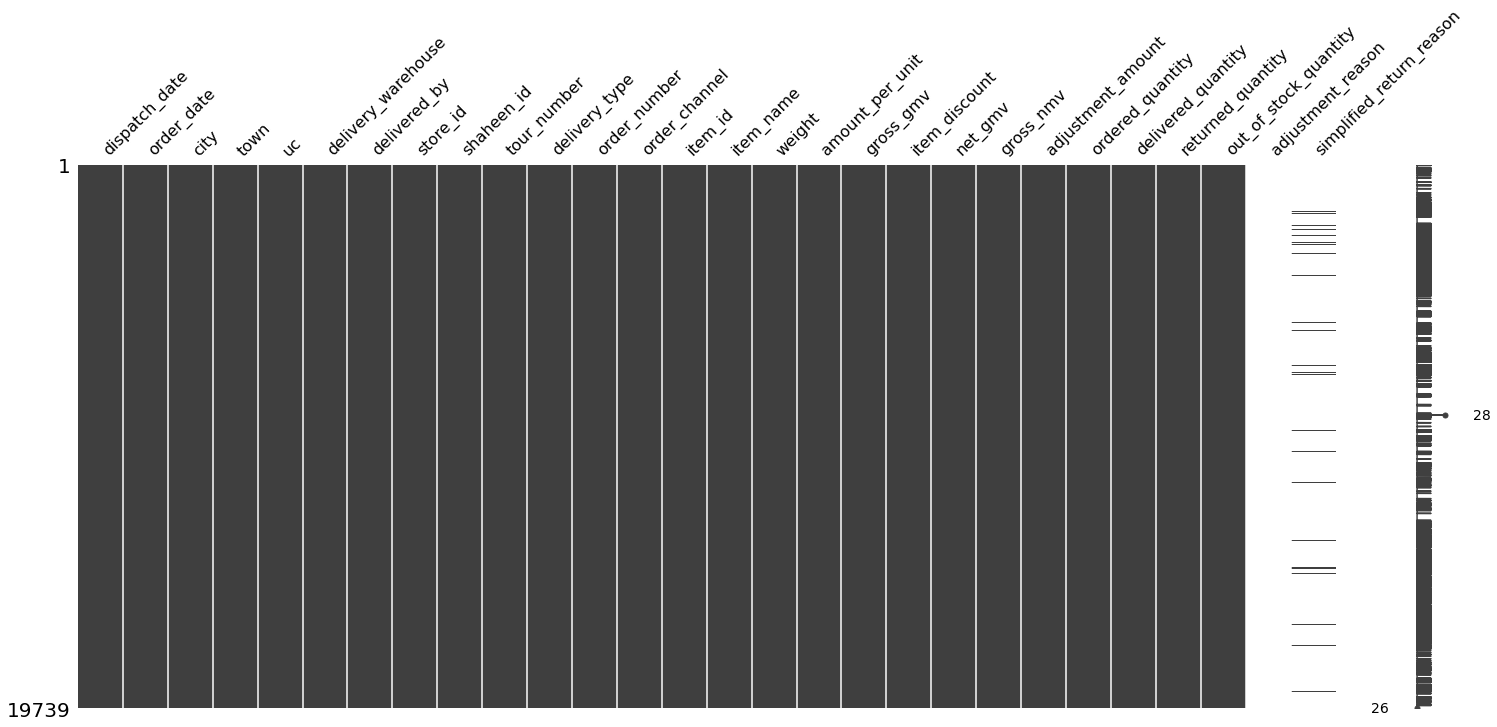

In [5]:
msgn.matrix(dataset)
plt.show()

After careful consideration, we have decided to retain these missing values in our analysis. The missing values in these columns represent situations where the corresponding information is not available from the customer's side. By leaving these values as null, we ensure that our analysis accurately reflects the limitations of the data and avoids introducing potentially misleading or fabricated information.

Furthermore, we noticed that the **order_date** and **dispatch_date** columns were initially recorded as _object_ data types. Realizing the significance of accurate date representation, we converted these columns into the appropriate _date_ data types. 

In [6]:
dataset['dispatch_date'] = pd.to_datetime(dataset['dispatch_date'], format = "%m/%d/%Y", infer_datetime_format=True)
dataset['order_date'] = pd.to_datetime(dataset['order_date'], format = "%m/%d/%Y", infer_datetime_format=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19739 entries, 0 to 19738
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   dispatch_date             19739 non-null  datetime64[ns]
 1   order_date                19739 non-null  datetime64[ns]
 2   city                      19739 non-null  object        
 3   town                      19739 non-null  object        
 4   uc                        19739 non-null  object        
 5   delivery_warehouse        19739 non-null  object        
 6   delivered_by              19739 non-null  object        
 7   store_id                  19739 non-null  object        
 8   shaheen_id                19739 non-null  object        
 9   tour_number               19739 non-null  object        
 10  delivery_type             19739 non-null  object        
 11  order_number              19739 non-null  object        
 12  order_channel     

Throughout our analysis, we will remain mindful of the missing values and their potential impact on our findings. We will focus on exploring the available information, examining trends, and drawing meaningful conclusions based on the data that we have.

# EXPLORATORY DATA ANALYSIS

## City Distribution

One of the first insight we gain from the dataset is the distribution of entries across different cities. By analyzing the _city_ column, we can observe that there are **12,811 entries for Peshawar** and **6,928 entries for Gujranwala**. This information provides an initial understanding of the geographical distribution of the dataset entries.

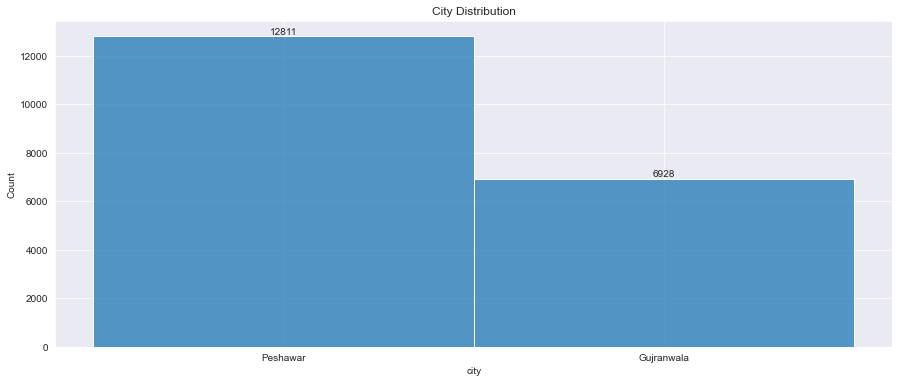

In [8]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
plot = sns.histplot(data=dataset['city'])
plot.bar_label(plot.containers[0])
plt.title("City Distribution")
plt.show()

## Town Distribution

Analyzing the _town_ column provides us with insights into the distribution of entries across different towns. To gain a visual understanding of the distribution of entries across different towns, we have plotted a histogram which shows that **University Town, Eminabad and Kamoke Town, and Alam Chawk & Satellite Town**, have a relatively higher number of entries compared to others. This could indicate a higher concentration of customers or businesses in these areas.

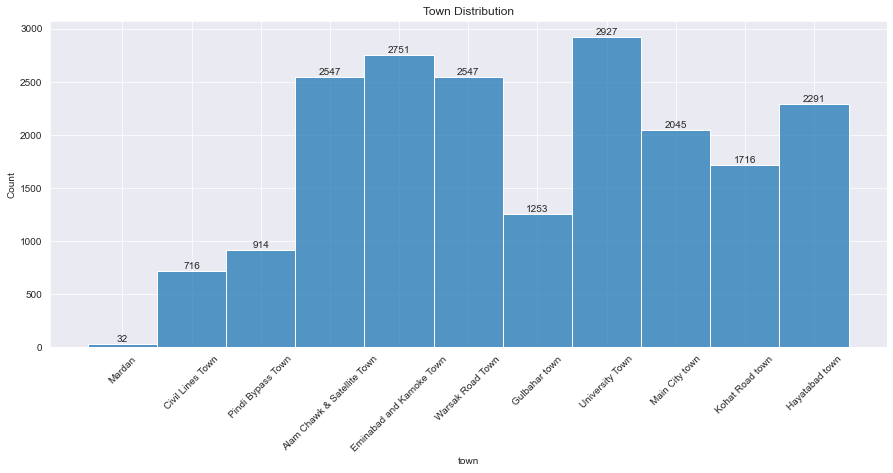

In [48]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
plot = sns.histplot(data=dataset['town'])
plot.bar_label(plot.containers[0])
plt.xticks(rotation=45)
plt.title("Town Distribution")
plt.show()

## UC Distribution

The _uc_ column in the dataset represents the union council where the store is located. The column contains **81 unique values**, indicating the presence of various union councils in the dataset. From the chart, we observe that the UCs with the highest number of entries include **PSH - 20 (Shauba, Dabgari), PSH - 13 (Tehkal, Defence), and PSH - 10 (Old Bara Rd, Abdara Rd)**. These UCs may have a significant presence in the dataset, indicating a higher concentration of activities or customer interactions. On the other hand, some UCs have relatively lower numbers of entries, such as **PSH - 46 (Doranpur, Gulozai), PSH - 43 (Taru Jabba + Pabbi), and PSH - 28 (Phandu Rd, Sheikh Baba)**. These UCs may have fewer instances or lower customer engagement within the dataset.

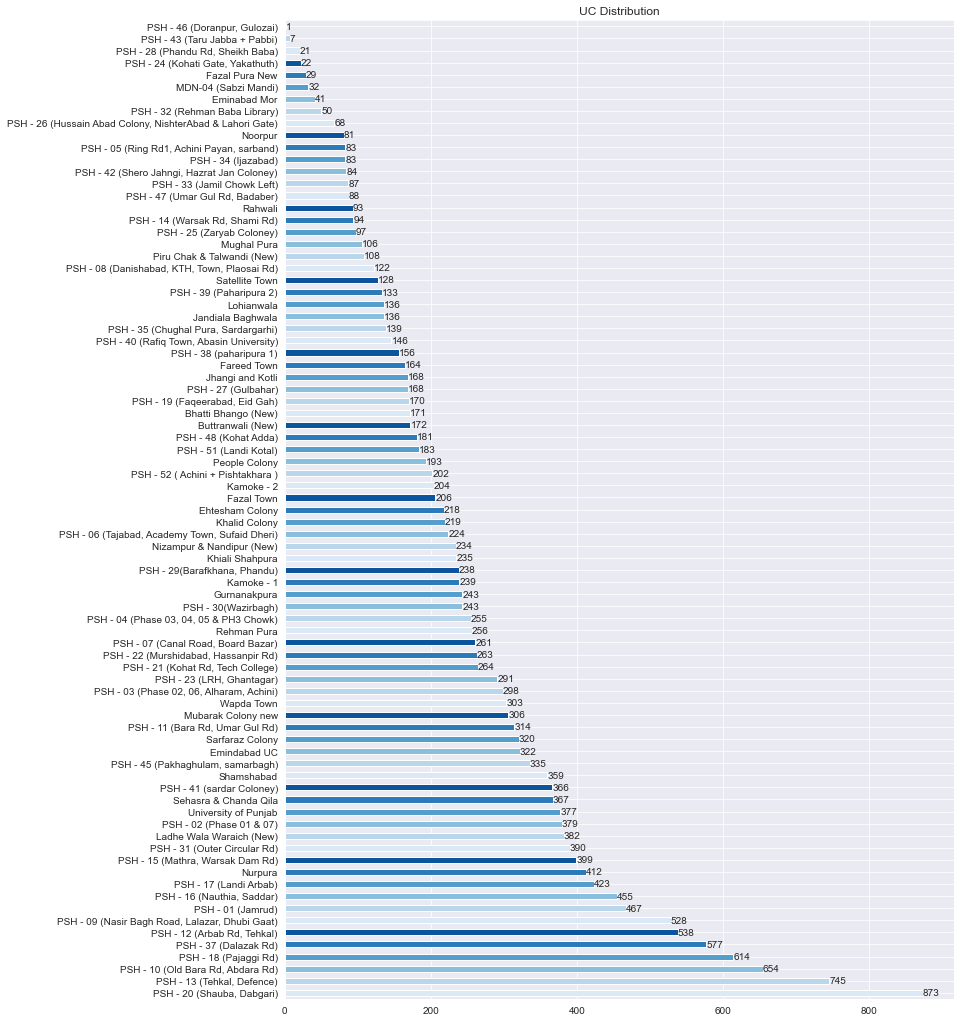

In [70]:
plt.figure(figsize=(12,18))
sns.set_style('darkgrid')
plot = dataset['uc'].value_counts().plot(kind='barh', color=sns.color_palette("Blues"))
plot.bar_label(plot.containers[0])
plt.title("UC Distribution")
plt.show()

## Distribution of Delivery Warehouses

The _delivery_warehouse_ column in the dataset provides information about the warehouses that serve the delivery operations. Upon analyzing the data, we discovered that there are three primary delivery warehouses mentioned in the dataset: **P1, G1, and ISB1** where P1 contains the highest number of orders followed by G1 and followed by ISB1. The histogram visualization provides insights into the distribution of orders among these warehouses.

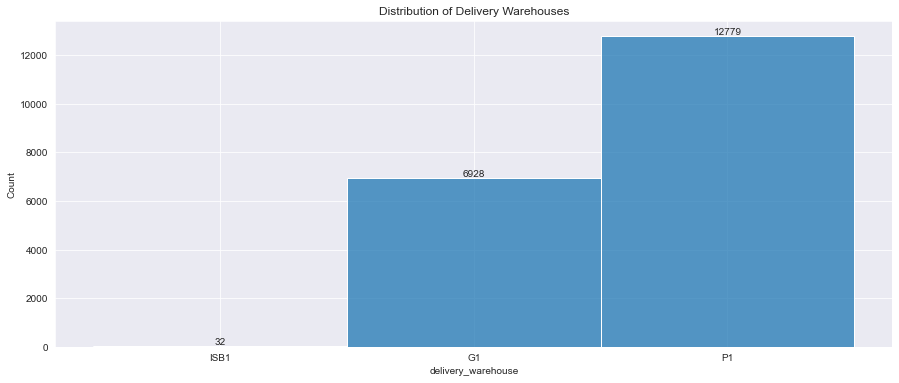

In [11]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
plot = sns.histplot(data=dataset['delivery_warehouse'])
plot.bar_label(plot.containers[0])
plt.title("Distribution of Delivery Warehouses")
plt.show()

## Distribution of Delivery Personnel

The _delivered_by_ column in the dataset provides information about the groups of individuals responsible for order delivery. It includes two distinct categories named **BAZAAR_RIDER** and **MANUAL_TOUR**. Upon analyzing the data, we discovered that the majority of orders, specifically **19,734 out of 19,739, were delivered by Bazaar Riders**. However, there were a small number of orders, **only 5 out of 19,739, that were marked as MANUAL_TOUR** in terms of their delivery personnel.

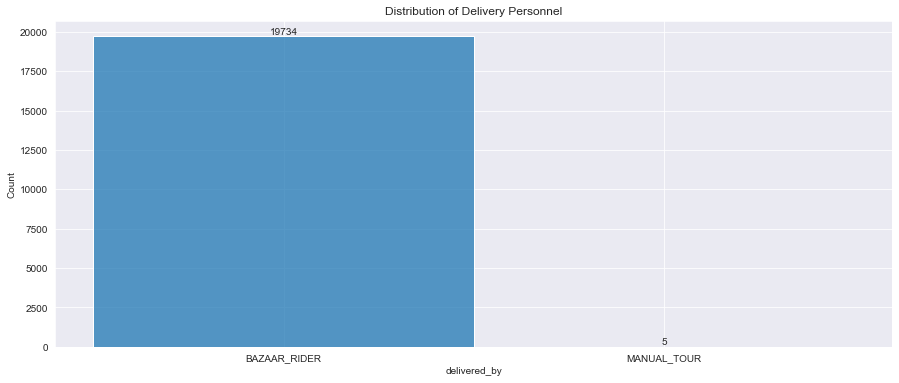

In [12]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
plot = sns.histplot(data=dataset['delivered_by'])
plot.bar_label(plot.containers[0])
plt.title("Distribution of Delivery Personnel")
plt.show()

## Bazaar's Operational Assets

As we delve into the dataset, we discover crucial components that form the operational backbone of Bazaar. These assets are instrumental in facilitating Bazaar's delivery operations, managing customer interactions, and optimizing logistical processes. With a total of **2792 unique store IDs**, Bazaar serves a broad and varied customer base across Pakistan. Each store ID represents a distinct customer or business entity associated with Bazaar's platform. 

Bazaar relies on a dedicated team of delivery riders to ensure timely and efficient order fulfillment. The dataset includes **55 unique Shaheen IDs**, each representing an individual delivery rider.

Efficient transportation is crucial for Bazaar's delivery operations. The dataset records **205 unique tour numbers**, which correspond to the vehicles employed by Bazaar for order deliveries. 

By recognizing the importance of these operational assets, we gain a deeper understanding of Bazaar's capacity to serve its customers effectively. Analyzing store IDs, Shaheen IDs, and tour numbers allows us to evaluate Bazaar's market penetration, delivery performance, and logistics management.

In [13]:
print("Total Stores: ", len(dataset['store_id'].value_counts()))
print("Total Riders: ", len(dataset['shaheen_id'].value_counts()))
print("Total Vehicles", len(dataset['tour_number'].value_counts()))

Total Stores:  2792
Total Riders:  55
Total Vehicles 205


## Delivery Types Distribution

Bazaar offers customers multiple delivery options to cater to their diverse needs and preferences. The dataset reveals that the majority of entries, **19737 out of 19739**, correspond to **DELIVERY_ORDER**. Only **2 entries** fall under the **SPOT_SALE** delivery type. This indicates that the _DELIVERY_ORDER_ option provide convenience and reliability to customers.

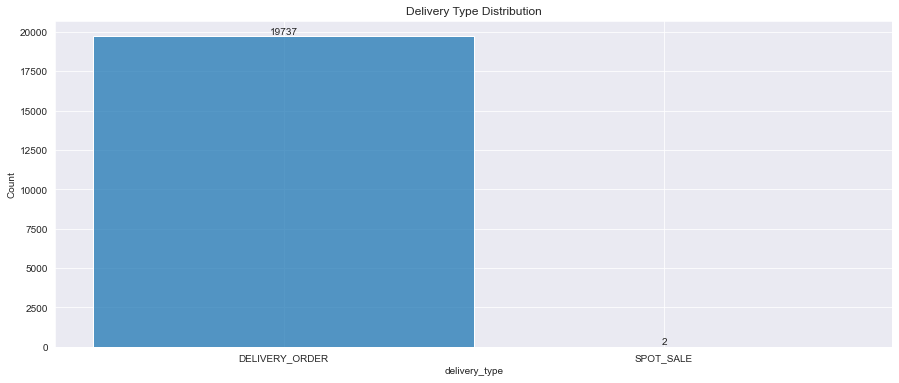

In [14]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
plot = sns.histplot(data=dataset['delivery_type'])
plot.bar_label(plot.containers[0])
plt.title("Delivery Type Distribution")
plt.show()

## Order Channel Distribution

The dataset comprises a total of **5,404 orders** with different products, each representing a unique transaction within Bazaar's platform. These orders span across different order channels, providing valuable insights into how customers interact with Bazaar's platform. The distribution of order channels in the dataset shows that the majority of orders, **14,962 out of 19,739**, were placed through the **CUSTOMER_APP.** A significant portion of orders, **4,764 out of 19,739**, were placed through the **AGENT_APP**, **11 with ADMIN_COMMANDO** and only **2 with the SPOT_SALE**. 

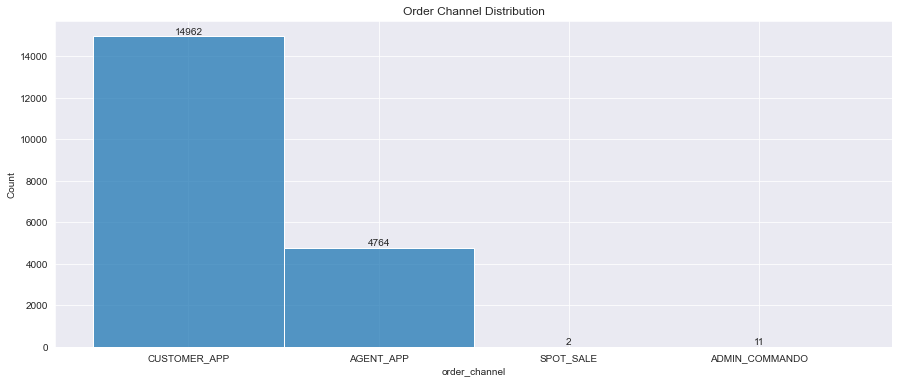

In [15]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
plot = sns.histplot(data=dataset['order_channel'])
plot.bar_label(plot.containers[0])
plt.title("Order Channel Distribution")
plt.show()

## Product Insights

The dataset encompasses a total of **597 unique products**, each offering a distinct value proposition to Bazaar's customers. 

The _weight_ column provides insights into the physical attributes of the products available on the platform. Analyzing the weight statistics reveals the following:

- Mean Weight: The average weight of products is approximately **2.62 Kgs**.
- Minimum Weight: The minimum recorded weight is **0.003 grams**.
- Maximum Weight: The heaviest product recorded in the dataset weighs **50.00 Kgs**.

These weight statistics provide an understanding of the product range's physical characteristics and variations.

The _amount_per_unit_ column sheds light on the pricing structure of Bazaar's products. Exploring the statistics of this column reveals the following:

- Mean Price per Unit: The average price per unit of the products is approximately **Rs. 741.02**.
- Minimum Price per Unit: The lowest recorded price is  **Rs. 19.00**.
- Maximum Price per Unit: The highest-priced product in the dataset is priced at **Rs. 8920.00**.

These pricing insights reflect the diverse range of product offerings within Bazaar's platform, accommodating different budgetary preferences and purchasing power.

In [20]:
dataset[['weight', 'amount_per_unit']].describe()

,weight,amount_per_unit
count,19739.000000,19739.000000
mean,2.619082,741.017427
std,4.290583,1274.711105
min,0.003000,19.000000
25%,0.220000,109.000000
50%,0.375000,183.000000
75%,4.800000,860.000000
max,50.000000,8920.000000


The dataset comprises a wide variety of products offered by Bazaar, catering to the diverse needs and preferences of its customers. Below output shows the top 20 products based on customer demand along with their respective ordered quantities.

In [21]:
dataset.groupby('item_name')['ordered_quantity'].sum().sort_values(ascending=False).head(20)

item_name
Tapal Tezdum 8 gm Sachet x 10                  2645
Capstan by Pall Mall (10 packs)                2470
All Max Tea Whitener 223 ml Carton (27 pcs)    2218
Dettol Soap 85 gm Original Pack of 3           2011
Dettol Soap 85 gm Original                     1626
Dettol Soap 85 gm Cool                         1399
Shan Bombay Biryani Single Pack                1343
Bisconni Cocomo Double Chocolate Rs. 50 Bag    1162
Slice Mango Juice 200 ml Carton (24 pcs)       1080
Ariel Washing Powder 1 Kg Pack                 1000
Lifebuoy Shampoo Herbal 12 ml Sachet x 16       800
Hilal Aamrus Candy Rs. 2 Bag (25 pcs)           789
Coca-Cola 2.25L Pack x 6                        783
Sting Red Berry 500 ml Pack x 12                775
Sooper Biscuits Rs. 30 Box (6 pcs)              761
LU Candi Original Rs. 30 Box (6 pcs)            713
Ariel Washing Powder 66 gm Sachet x 6           711
Party Biscuits Rs. 30 Box (6 pcs)               710
Lifebuoy Soap Nature 128 gm                     686
Co

The customer preferences showcased through the top 5 products indicate a demand for tea, tobacco products, tea whitener, hygiene products, and soaps with specific features such as freshness or coolness.

## Summary of Order Financials and Discounts

In [22]:
dataset[['gross_gmv', 'net_gmv', 'gross_nmv', 'item_discount', 'adjustment_amount']].describe().apply(lambda x: x.apply('{0:.5f}'.format))

,gross_gmv,net_gmv,gross_nmv,item_discount,adjustment_amount
count,19739.00000,19739.00000,19739.00000,19739.00000,19739.00000
mean,1601.84184,1594.10669,1507.53042,0.81534,0.66635
std,8414.39824,7993.72474,8158.86686,5.30119,28.74002
min,19.00000,19.00000,0.00000,0.00000,0.00000
25%,212.00000,212.00000,169.00000,0.00000,0.00000
50%,570.00000,565.00000,507.00000,0.00000,0.00000
75%,1710.00000,1710.00000,1620.00000,0.00000,0.00000
max,1007500.00000,937750.00000,1007500.00000,450.00000,2700.00000


The provided information presents a summary of the order financials and discounts in the dataset. The following metrics are included:

- **gross_gmv:** The average Gross Merchandise Value (GMV) of the orders is approximately **Rs. 1,601.84**. The standard deviation indicates a significant variation in GMV, with a minimum value of **Rs. 19** and a maximum value of **Rs. 1,007,500**.

- **net_gmv:** The average net GMV after deducting discounts is around **Rs. 1,594.11**. The standard deviation suggests a considerable range in net GMV, with a minimum value of **Rs. 19** and a maximum value of **Rs. 937,750**.

- **gross_nmv:** The average gross Net Merchandise Value (NMV) of the orders is approximately **Rs. 1,507.53**. The standard deviation indicates a significant variation in gross NMV, with a minimum value of **Rs. 0** and a maximum value of **Rs. 1,007,500**.

- **item_discount:** On average, a small discount of **Rs. 0.82** is applied to each item in the orders. The minimum and maximum values for item discounts are **Rs. 0 and Rs. 450**, respectively.

- **adjustment_amount:** The average adjustment amount applied to the orders is approximately **Rs. 0.67**, with a standard deviation of **Rs. 28.74**.

The data indicates a wide range of order financials and discounts, with significant variations observed in GMV and NMV. The presence of discounts and adjustment amounts suggests that promotional offers or adjustments may be applied to certain orders.

The accompanying bar plot visualizes the distribution of the total gross GMV, net GMV, and gross NMV. It provide an overview of the overall financial performance of the dataset, showcasing the cumulative revenue generated by the orders.

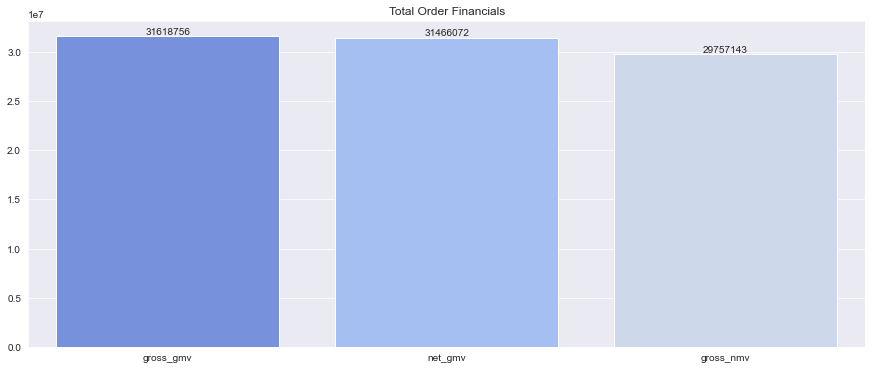

In [59]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
gmvs = dataset[['gross_gmv', 'net_gmv', 'gross_nmv']].sum()
plot = sns.barplot(x=gmvs.index, y=gmvs, palette=sns.color_palette("coolwarm"))
plot.bar_label(plot.containers[0], labels=[f'{x.get_height():.0f}' for x in plot.containers[0]])
plt.title("Total Order Financials")
plt.show()

## Order Quantity Details

In [24]:
dataset[['ordered_quantity', 'delivered_quantity', 'returned_quantity', 'out_of_stock_quantity']].describe()

,ordered_quantity,delivered_quantity,returned_quantity,out_of_stock_quantity
count,19739.000000,19739.000000,19739.000000,19739.000000
mean,3.250671,3.077664,0.171032,0.001976
std,7.231791,7.067169,1.664398,0.105316
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000
75%,3.000000,3.000000,0.000000,0.000000
max,455.000000,450.000000,100.000000,12.000000


The provided information presents the statistics related to the quantity of items in orders. The following metrics are included:

- **ordered_quantity:** The average number of items ordered per order is approximately **3.25**. This shows that the typical quantity of items customers purchase in a single order.

- **delivered_quantity:** On average, approximately **3.08 items** are successfully delivered per order. This represents the average quantity of items that reach the customers.

- **returned_quantity:** The average number of items returned per order is **0.17**. This indicates the average quantity of items that customers decide to return for various reasons.

- **out_of_stock_quantity:** On average, only **0.002 items** per order are reported as out of stock. This represents the rare occurrence of items being unavailable at the time of order fulfillment.

These statistics provide insights into the quantity dynamics of the orders, including the average number of items ordered, delivered, returned, and the occurrence of out-of-stock items.

It is important to note that the values provided are aggregated across the entire dataset, capturing the overall trends in order quantities. The bar chart visualization provides a visual representation of these quantities, enabling a quick understanding of the distribution and comparison between different categories.

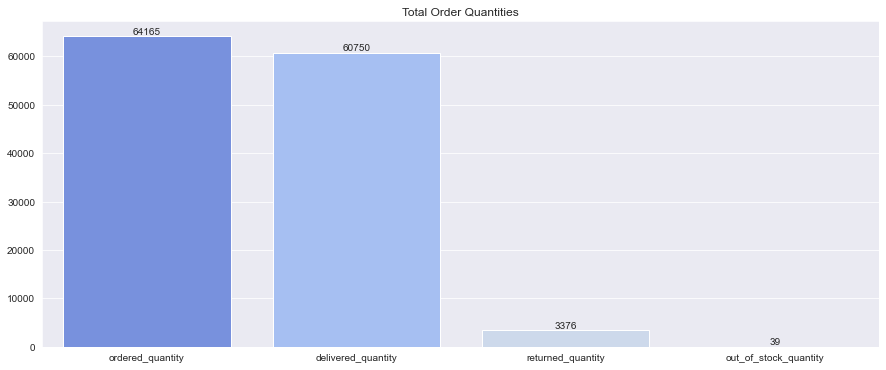

In [60]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
quantities = dataset[['ordered_quantity', 'delivered_quantity', 'returned_quantity', 'out_of_stock_quantity']].sum()
plot = sns.barplot(x=quantities.index, y=quantities, palette=sns.color_palette("coolwarm"))
plot.bar_label(plot.containers[0])
plt.title("Total Order Quantities")
plt.show()

## Return Reason Analysis

The _simplified_return_reason_ column provides valuable insights into the reasons behind product returns. The most common reason for returns is **Customer Issue**, accounting for **735 occurrences**. This indicates that customers are returning products due to various concerns or dissatisfaction. Another significant reason is **Fake Order**, contributing to **256 returns**. This suggests that some orders may have been placed fraudulently or without genuine intent. **Ops Issue** is another noteworthy reason, with **161 returns** attributed to operational factors. This could include issues related to order processing, packaging, or delivery logistics. Additionally, **Order Cancelled** is responsible for **23 returns**, indicating instances where customers requested cancellation of their orders after placing them. Furthermore, there were **45 returns** due to **Price Issue**, indicating customer dissatisfaction with the pricing of certain products. Quality concerns were responsible for **10 returns (Quality Issue)**, and only **one return** was related to a **Quantity Issue.**

A histogram was plotted to visually represent the frequency distribution of these simplified return reasons. This visualization helps identify the most prevalent reasons for returns and assists in understanding customer behavior and preferences.

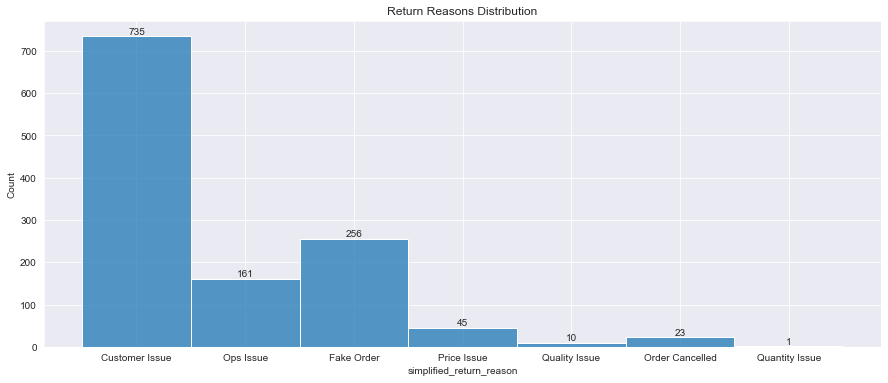

In [61]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
plot = sns.histplot(data=dataset['simplified_return_reason'])
plot.bar_label(plot.containers[0])
plt.title("Return Reasons Distribution")
plt.show()

The following are the top returned items provides insights into the products that experienced the highest number of returns.

In [27]:
dataset.groupby('item_name')['returned_quantity'].sum().sort_values(ascending=False).head(10)

item_name
Dettol Soap 85 gm Original Pack of 3           274
Lifebuoy Soap Nature 128 gm                    133
Dettol Soap 85 gm Original                     123
Sprite 1.5L Pack x 6                           106
Capstan by Pall Mall (10 packs)                 89
Tapal Tezdum 8 gm Sachet x 10                   89
Safeguard Soap Lemon 103 gm                     87
All Max Tea Whitener 223 ml Carton (27 pcs)     69
Sting Red Berry 500 ml Pack x 12                58
Dettol Soap 85 gm Cool                          55
Name: returned_quantity, dtype: int64

It is evident that there is a diverse range of product categories represented. These include personal care items such as soaps and tea whitener, beverages such as soft drinks and juices, and household products like washing powder. The variety of product categories indicates that return rates are not specific to a particular type of product but are spread across different consumer goods. This suggests that there may be various factors contributing to the returns, such as product quality, customer preferences, or issues related to packaging and delivery.

## Order and Return Quantity Trend

The line plot showcases the trend of ordered quantities over a specific time period. The data reveals that the order quantities varied on different dates. On July 30, there was a significant surge in ordered quantities, reaching 6,364. This was followed by a consistent increase in order quantities from **July 31 to August 4**, with the highest peak observed on **August 3, at 13,939 orders**.

The line plot provides a visual representation of the order quantity trend over the specified time period, allowing us to observe any notable patterns or fluctuations in customer demand.

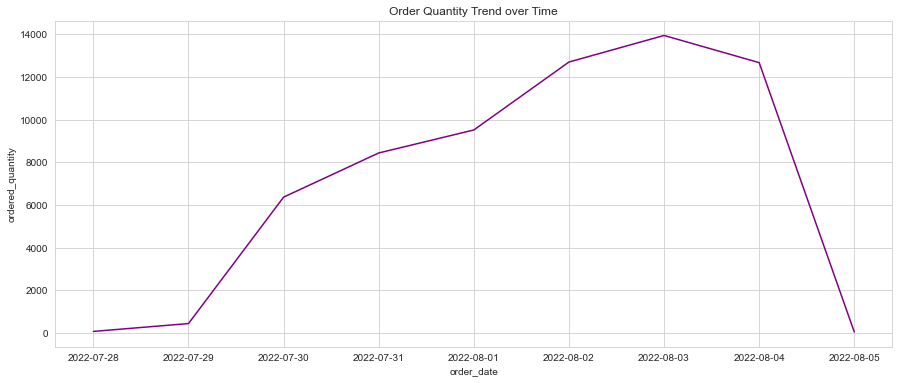

In [65]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
orders_by_date = dataset.groupby('order_date')['ordered_quantity'].sum()
sns.lineplot(x=orders_by_date.index, y=orders_by_date, color='purple')
plt.title("Order Quantity Trend over Time")
plt.show()

In [146]:
orders_by_date

order_date
2022-07-28       72
2022-07-29      440
2022-07-30     6364
2022-07-31     8433
2022-08-01     9511
2022-08-02    12694
2022-08-03    13939
2022-08-04    12666
2022-08-05       46
Name: ordered_quantity, dtype: int64

Also, the data reveals that the number of returned quantities varied on different dates. On July 30, there was a notable increase in returned quantities, reaching 528. This was followed by fluctuations in returned quantities from July 31 to August 3, with the highest peak observed on **August 4, at 1068 returns**. The line plot provides a visual representation of the returned quantity trend, enabling us to identify any significant patterns or fluctuations in return rates.

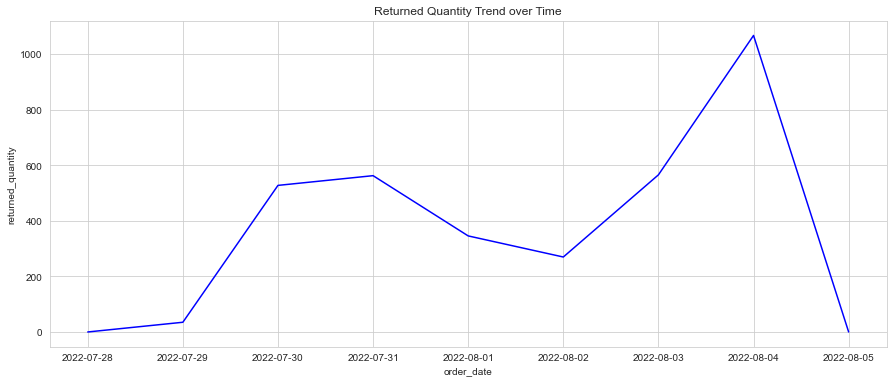

In [66]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
return_by_date = dataset.groupby('order_date')['returned_quantity'].sum()
sns.lineplot(x=return_by_date.index, y=return_by_date, color='blue')
plt.title("Returned Quantity Trend over Time")
plt.show()

In [150]:
return_by_date

order_date
2022-07-28       0
2022-07-29      35
2022-07-30     528
2022-07-31     563
2022-08-01     346
2022-08-02     270
2022-08-03     566
2022-08-04    1068
2022-08-05       0
Name: returned_quantity, dtype: int64

We observed that the maximum number of orders has been placed on August 3 and maximum number of returns happened on August 4. Below output shows top 10 items of _ordered_quantity_ and _returned_quantity_ of these specific dates:

In [42]:
dataset_max_orders = dataset[dataset['order_date'] == '2022-08-03']
dataset_max_orders.groupby('item_name')['ordered_quantity'].sum().sort_values(ascending=False).head(10)

item_name
Tapal Tezdum 8 gm Sachet x 10                  1482
Capstan by Pall Mall (10 packs)                 565
Dettol Soap 85 gm Original Pack of 3            501
Bisconni Cocomo Double Chocolate Rs. 50 Bag     492
Dettol Soap 85 gm Original                      477
Nestle Milkpak 250 ml Pack                      455
Ariel Washing Powder 1 Kg Pack                  389
Shan Bombay Biryani Single Pack                 370
All Max Tea Whitener 223 ml Carton (27 pcs)     325
Lifebuoy Soap Nature 128 gm                     289
Name: ordered_quantity, dtype: int64

In [43]:
dataset_max_return_orders = dataset[dataset['order_date'] == '2022-08-04']
dataset_max_return_orders.groupby('item_name')['returned_quantity'].sum().sort_values(ascending=False).head(10)

item_name
Dettol Soap 85 gm Original Pack of 3        274
Sprite 1.5L Pack x 6                        101
Lifebuoy Soap Nature 128 gm                  94
Dettol Soap 85 gm Original                   54
Ariel Washing Powder 1 Kg Pack               45
Capstan by Pall Mall (10 packs)              39
Hilal Jiggles Fruit Jelly Rs. 5 (36 pcs)     26
Dettol Soap 85 gm Cool                       25
Hilal Khopra Candy Rs. 2 Bag (25 pcs)        20
Hilal Aamrus Candy Rs. 2 Bag (25 pcs)        20
Name: returned_quantity, dtype: int64

The data reveals an interesting pattern between the orders and returns of the products. On August 3, there was a high demand for items such as **Tapal Tezdum, Capstan by Pall Mall, Dettol Soap, and Bisconni Cocomo**, as reflected by the significant number of orders placed for these products. This indicates a positive customer preference and strong sales potential for these items.

However, it is noteworthy that some of these popular items, such as **Dettol Soap and Ariel Washing Powder**, also appeared in the top returned items on August 4. This suggests a discrepancy between customer expectations and the actual experience with these products, leading to a relatively higher number of returns.

# CONCLUSION

The analysis of the provided dataset has yielded valuable insights into customer behavior, product performance, order dynamics, and returns. Here are the key conclusions drawn from the data:

- **_Demand Analysis:_** By examining the _ordered_quantity_ and _gross_gmv_ data, we observed that certain products consistently ranked high in terms of customer demand and generated significant revenue. These products include **Tapal Tezdum, Capstan by Pall Mall, Dettol Soap, and Ariel Washing Powder**. This indicates that these items are popular among customers and contribute significantly to the overall sales.

- **_Return Analysis:_** The _returned_quantity_ data provided insights into the products that experienced the highest number of returns. **Dettol Soap, Lifebuoy Soap Nature, Sprite, and Ariel Washing Powder** were among the products with a notable number of returns. It is crucial to investigate the reasons behind these returns, such as potential quality issues or customer dissatisfaction, and take appropriate measures to address them.

- **_Order Trends:_** Analyzing the _ordered_quantity_ data by date revealed fluctuations in customer ordering patterns. For example, August 3 witnessed the highest number of orders, while August 4 had a relatively high number of returns. These trends may not be directly linked to specific occasions but could be influenced by factors such as promotional activities, seasonal variations, or customer behavior. Monitoring and understanding these trends can help businesses optimize their operations and inventory management strategies.

- **_Customer Preferences:_** Considering the top products in terms of _ordered_quantity_ and _returned_quantity_, we can infer certain customer preferences. Products like **Tapal Tezdum, Capstan by Pall Mall, and Dettol Soap** have consistent demand, indicating their popularity among customers. On the other hand, products like **Sprite and Ariel Washing Powder** experienced a higher number of returns, suggesting potential issues with quality or customer expectations.

# RECOMMENDATION

Based on the dataset and analysis we conducted, the following recommendations can be made:

- **_Inventory Management:_** Identify the top-selling products and ensure an adequate stock of these items to meet customer demand. Analyze the out-of-stock quantities and take proactive measures to minimize such occurrences.

- **_Customer Preferences:_** Pay close attention to the customer preferences indicated by the top-selling products. Consider offering promotions or discounts on these items to further boost sales. Additionally, gather feedback from customers to understand their preferences and tailor product offerings accordingly.

- **_Return Management:_** Investigate the reasons for product returns, especially for the top-returned items. Address any quality issues or concerns related to these products to minimize returns. Implement a robust return management system to streamline the process and provide prompt refunds or replacements to customers.

- **_Order and Return Trends:_** Monitor the order and return trends based on dates. Identify any patterns or anomalies, such as the high number of orders on specific dates or the peak in returns on certain days. This analysis can help identify potential factors influencing customer behavior and inform strategic decision-making.

- **_Sales and Marketing Strategies:_** Leverage the insights gained from the dataset to develop targeted sales and marketing strategies. Focus on promoting the top-selling products and communicate their unique features or benefits to attract more customers. Consider running marketing campaigns aligned with customer preferences to maximize sales potential.

By implementing these recommendations, businesses can better understand customer preferences, improve product quality, reduce returns, and ultimately enhance customer satisfaction and business performance.

><center><i>I would like to express my gratitude for the opportunity to work on this case study. I hope the insights provided have been valuable. I look forward to the possibility of joining the team and contributing to the company's mission. For further discussion, please reach out via email at <a>faizanwaseem476@gmail.com</a> or connect on LinkedIn at <a href=https://www.linkedin.com/in/muhammad-faizan-51a892202>https://www.linkedin.com/in/muhammad-faizan-51a892202</a>. Thank you for the opportunity and I hope to be a part of Bazaar Technologies.</i> </center>